In [1]:
%load_ext tensorboard

In [2]:
import datetime
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import keras

from tqdm import tqdm

2024-08-11 17:47:41.548127: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-11 17:47:41.573166: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-11 17:47:41.573194: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-11 17:47:41.573816: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-11 17:47:41.578120: I tensorflow/core/platform/cpu_feature_guar

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import SGD, Adam


In [4]:
# gpu_options = tf.GPUOptions(visible_device_list="0")
# sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

In [5]:
# GPU settings



gpus = tf.config.list_physical_devices('GPU')



# Setting gpu[0] as main device
if gpus:
  try:
    tf.config.set_visible_devices(gpus[0], 'GPU')
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
  except RuntimeError as e:
    # Visible devices must be set before GPUs have been initialized
    print(e)


# Setting memory growth
try:
  tf.config.experimental.set_memory_growth(gpus[0], True)
except:
  # Invalid device or cannot modify virtual devices once initialized.
  pass



# tf.debugging.set_log_device_placement(True)


os.environ['TF_GPU_ALLOCATOR'] = 'cuda_malloc_async'
print(os.getenv('TF_GPU_ALLOCATOR'))

tf.debugging.set_log_device_placement(True)


1 Physical GPUs, 1 Logical GPU
cuda_malloc_async


2024-08-11 17:47:42.874796: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-08-11 17:47:42.922639: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-08-11 17:47:42.922947: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [6]:
#defining model

class AlexNet(Sequential):
    def __init__(self, input_shape, num_classes):
        super().__init__()

        self.add(Conv2D(
            96, 
            kernel_size=(11, 11), 
            strides=4, 
            padding="valid", 
            activation="relu", 
            input_shape=input_shape,
            kernel_initializer="he_normal"
        ))
        
        self.add(MaxPooling2D(
            pool_size=(3, 3),
            strides = (2, 2),
            padding = "valid",
            data_format = None
        ))

        self.add(Conv2D(
            256,
            kernel_size=(5, 5),
            strides=1,
            padding="same",
            activation="relu",
            kernel_initializer="he_normal"
        ))

        self.add(MaxPooling2D(
            pool_size=(3, 3),
            strides = (2, 2),
            padding="valid",
            data_format=None
        ))

        self.add(Conv2D(
            384,
            kernel_size=(3, 3),
            strides=1,
            padding="same",
            activation="relu",
            kernel_initializer="he_normal"
        ))

        self.add(Conv2D(
            384,
            kernel_size=(3, 3),
            strides=1,
            padding="same",
            activation="relu",
            kernel_initializer="he_normal"
        ))

        self.add(Conv2D(
            256,
            kernel_size=(3, 3),
            strides=1,
            padding="same",
            activation="relu",
            kernel_initializer="he_normal"
        ))

        self.add(MaxPooling2D(
            pool_size=(3, 3),
            strides=(2, 2),
            padding="valid",
            data_format=None
        ))

        self.add(Dropout(0.5))
        self.add(Flatten())
        self.add(Dropout(0.5))
        self.add(Dense(4096, activation="relu"))
        self.add(Dense(4096, activation="relu"))
        self.add(Dense(1000, activation="relu"))
        self.add(Dense(num_classes, activation="softmax"))

        self.compile(
            optimizer=Adam(learning_rate=0.001),
            loss = "categorical_crossentropy",
            metrics=["accuracy"]
        )


In [7]:
train_dir = "/home/abhinav/Documents/Work/2 Hobby_projects/Datasets/Imagenet/train_synsets"
valid_dir = "/home/abhinav/Documents/Work/2 Hobby_projects/Datasets/Imagenet/valid_synsets"
test_dir = "/home/abhinav/Documents/Work/2 Hobby_projects/Datasets/Imagenet/test_synsets"

model_dir = "/home/abhinav/Documents/Work/2 Hobby_projects/Models"

In [8]:
num_classes = 3
epochs = 50
batch_size = 32
Image_height = 227
Image_width = 227

model = AlexNet((227, 227, 3), num_classes)
model.summary()

Model: "alex_net"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2  (None, 27, 27, 96)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 384)       885120    
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 384)       132

In [9]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (Image_height, Image_width),
    color_mode="rgb",
    batch_size=batch_size,
    seed=1,
    shuffle=True,
    class_mode="categorical"
)

valid_datagen = ImageDataGenerator(
    rescale=1./255
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(Image_height, Image_width),
    color_mode="rgb",
    batch_size=batch_size,
    seed=7,
    shuffle=True,
    class_mode="categorical"
)

test_datagen = ImageDataGenerator(
    rescale=1.0/255.0
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(Image_height, Image_width),
    color_mode="rgb",
    batch_size=batch_size,
    seed=7,
    shuffle=True,
    class_mode="categorical"
)

train_num = train_generator.samples
valid_num = valid_generator.samples
train_num = train_generator.samples

Found 3605 images belonging to 3 classes.
Found 264 images belonging to 3 classes.
Found 39 images belonging to 3 classes.


In [10]:
# Has to be executed only once
# os.mkdir("./logs")
# os.mkdir("./logs/fit")

In [11]:
log_dir = "./logs/fit" + datetime.datetime.now().strftime("%d%m%Y-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
callbacks_list = [tensorboard_callback]

model.fit(
    train_generator,
    epochs=epochs,
    steps_per_epoch=train_num//batch_size,
    validation_data=valid_generator,
    validation_steps=valid_num//batch_size,
    callbacks=callbacks_list,
    verbose=1
)

Epoch 1/50


2024-08-11 17:47:43.546409: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-08-11 17:47:44.260122: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inalex_net/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2024-08-11 17:47:44.565799: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
2024-08-11 17:47:44.632067: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-08-11 17:47:45.632650: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 372.06MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-08-

In [ ]:
path_to_save_arch = os.path.join(model_dir, "AlexNet_arch")
print(path_to_save_arch)

/home/abhinav/Documents/Work/2 Hobby_projects/Models/AlexNet_arch


In [ ]:
model.save(path_to_save_arch)

INFO:tensorflow:Assets written to: /home/abhinav/Documents/Work/2 Hobby_projects/Models/AlexNet_arch/assets


INFO:tensorflow:Assets written to: /home/abhinav/Documents/Work/2 Hobby_projects/Models/AlexNet_arch/assets


x_valid_shape:  (32, 227, 227, 3)
1/1 [==============================] - 0s 21ms/step
predict_x:  [[7.06841229e-06 9.97767091e-01 2.22593173e-03]
 [9.91796494e-01 7.91217200e-03 2.91332311e-04]
 [3.06940773e-19 2.43142459e-15 1.00000000e+00]
 [1.52987279e-02 8.82933319e-01 1.01767898e-01]
 [9.97353792e-01 2.63642217e-03 9.79737342e-06]
 [3.57143617e-05 6.61965227e-04 9.99302268e-01]
 [8.79341066e-01 1.17636055e-01 3.02283303e-03]
 [9.81357992e-01 1.86239239e-02 1.80361585e-05]
 [6.42754323e-29 1.00000000e+00 5.76714366e-25]
 [2.15020634e-07 9.99376118e-01 6.23725471e-04]
 [2.86375126e-07 8.89121875e-05 9.99910831e-01]
 [8.00687253e-01 1.94364205e-01 4.94855270e-03]
 [9.99770820e-01 2.28172692e-04 1.01658929e-06]
 [2.45744993e-30 1.00000000e+00 7.69247119e-36]
 [4.01973171e-04 9.42631602e-01 5.69664165e-02]
 [7.35655092e-09 9.99999881e-01 1.28597293e-07]
 [3.57763907e-09 1.15654089e-07 9.99999881e-01]
 [8.94157961e-03 2.50100195e-01 7.40958273e-01]
 [3.55921910e-33 1.00000000e+00 2.2779

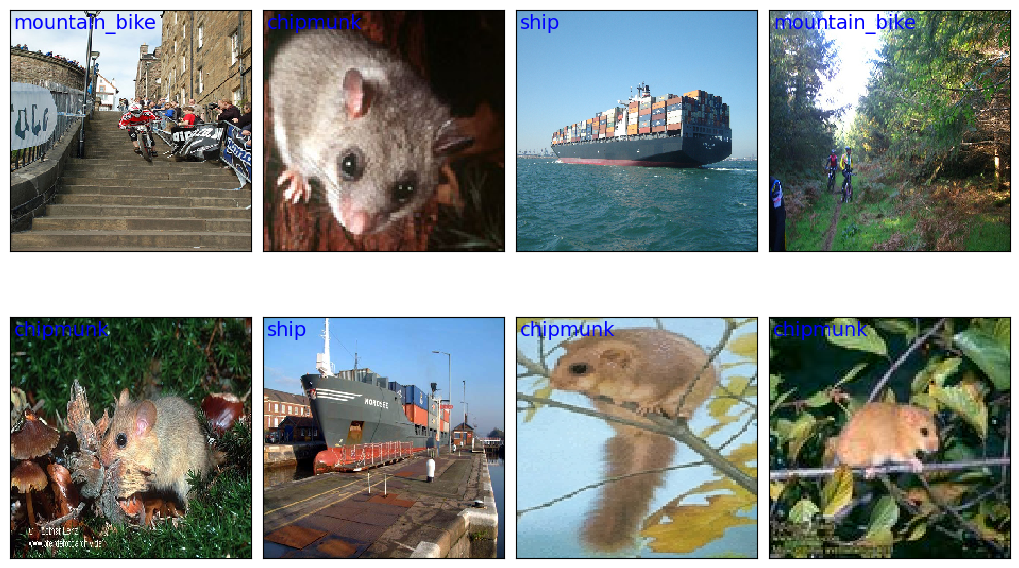

In [ ]:
#predictions

class_names = ['chipmunk', 'mountain_bike', 'ship']

x_valid, label_batch = next(iter(valid_generator))
# print("x_valid: ", x_valid)
# print("label_batch: ", label_batch)

print("x_valid_shape: ", x_valid.shape)

predict_x = model.predict(x_valid)
print("predict_x: ", predict_x)
prediction_values = np.argmax(predict_x,axis=1)
print("prediction_values", prediction_values)

fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(8):
    ax = fig.add_subplot(2, 4, i+1, xticks=[], yticks=[])
    ax.imshow(x_valid[i, :], cmap=plt.cm.gray_r, interpolation='nearest')
    if prediction_values[i] == np.argmax(label_batch[i]):
        print("label_batch[i]: ", label_batch[i])
        print("prediction_values[i]:  is the same as np.argmax(label_batch[i])", prediction_values[i])
        print("class_names: ", class_names)
        ax.text(3, 17, class_names[prediction_values[i]], color='blue', fontsize=14)
    else:
        ax.text(3, 17, class_names[prediction_values[i]], color='red', fontsize=14)

In [ ]:
results = model.evaluate(
    test_generator,
    verbose=2
)

print("Accuracy: ", results[1])
print("Loss: ", results[0])

2/2 - 0s - loss: 0.4287 - accuracy: 0.9231 - 125ms/epoch - 63ms/step
Accuracy:  0.9230769276618958
Loss:  0.4287163317203522
